In [1]:
#!pip install apyori
#!pip install NetworkX



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

from konlpy.tag import Okt

from functools import reduce
from wordcloud import WordCloud
import re

In [2]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [54]:
f = open('./cloud.txt', 'r', encoding='utf-8')
lines = f.readlines()
f.close
lines

['크리에이터 디자이너 기획 PC 게임 네트워크 게임 임용 소프트웨어 제작 관련 모든 사항 총괄 지휘 감독 담당 게임 시장조사 소비자 게임 인지 파악 새로운 게임제작 아이디어 구상 기획 작성 게임 \n',
 '장르 대상 연령 층 게임 난이도 게임 캐릭터 역할 특징 기본 스토리 전개 설정 그래픽디자이너 프로그래머 본격 게임 프로그램 제작 게임 소프트웨어 베타테스트 연회 참여 홍보 업무 대사 작성 \n',
 '등세 부적 게임 시나리오 작성 기획 쉽게 그래픽디자이너 프로그래머 전달 게임 제작 상품화 시장 진입 판매 고의 수익 판단 결정 게임 제작 완료 게임 홍보 마케팅 전략 배급 계획 수립 실행 장조 바탕 게임 \n',
 '즐기는 원하는지 파악 통찰 새로운 게임 소재 발굴 창의력 기획 요구 게임 산업 전반 지식 이해 마케팅 홍보 본적지 게임 좋아해야하고 영화 만화 소설 다양한 문화 장르 지식 요구 게임 \n',
 '개발 보통 팀 단위 팀원 원활한 관계 유지 관련 학과 관련 자격 관련 학과 응용소프트웨어 학과 전자공학 정보 통신공학 컴퓨터공학 관련 자격 게임\n',
 '게임 하는게 그냥 재미있으신 재미있는 게임 만들고싶으신 후자 쪽 이신 재미있는 게임 기획 하고만 들고싶다면 게임 기획 되려는 동기 충분하신데요 게임 \n',
 '좋아하는 많지만 기획 길은 은근 어렵습니다 팀 소통 역할 해야하고 설득 해야하고 조율 해야하지요 정말 쉬운게 없지요 거기 요새 뜨는 게임 매출 상위 권 게임 \n',
 '많이 해봐 야하니 몸 모자 있지요 기획 여러 분야 게임 들어가는 음악 모드 달라지죠 사운드 기획 음악 컨셉 맞추는거에요 게임\n',
 '게임 전반 난이도 조정 역량 기초 수학과 액셀 함수 능력 원활한 커뮤니케이션 능력 끊임없 테스트 해보는 분석 능력 아무리 수학 계산 한다해 실제 테스트 인내심 게임\n',
 '노가다 테스트 저렇게 해봐 야하죠 게임 기획 되서 항상 즐거운 일만 시스템 기획 컨텐츠 기획 기도 레벨 디자인 피씨 모바일 게임 넘어가면서 명확한 영역 구분 사라져서 시대

In [55]:
dataset = []
for i in range(len(lines)):
    dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]', '', lines[i])))
dataset

[['크리에이터',
  '디자이너',
  '기획',
  '게임',
  '네트워크',
  '게임',
  '임용',
  '소프트웨어',
  '제작',
  '관련',
  '사항',
  '총괄',
  '지휘',
  '감독',
  '담당',
  '게임',
  '시장조사',
  '소비자',
  '게임',
  '파악',
  '게임제작',
  '아이디어',
  '구상',
  '기획',
  '작성',
  '게임'],
 ['장르',
  '대상',
  '연령',
  '층',
  '게임',
  '난이',
  '게임',
  '캐릭터',
  '특징',
  '기본',
  '스토리',
  '전개',
  '설정',
  '그래픽디자이너',
  '프로그래머',
  '격',
  '게임',
  '프로그램',
  '제작',
  '게임',
  '소프트웨어',
  '베타테스트',
  '연회',
  '참여',
  '홍보',
  '업무',
  '대사',
  '작성'],
 ['등세',
  '부적',
  '게임',
  '시나리오',
  '작성',
  '기획',
  '그래픽디자이너',
  '프로그래머',
  '전달',
  '게임',
  '제작',
  '상품화',
  '시장',
  '진입',
  '판매',
  '고의',
  '수익',
  '판단',
  '결정',
  '게임',
  '제작',
  '완료',
  '게임',
  '홍보',
  '마케팅',
  '전략',
  '배급',
  '계획',
  '수립',
  '실행',
  '장조',
  '바탕',
  '게임'],
 ['파악',
  '통찰',
  '게임',
  '소재',
  '발굴',
  '창의력',
  '기획',
  '요구',
  '게임',
  '산업',
  '전반',
  '지식',
  '이해',
  '마케팅',
  '홍보',
  '본적지',
  '게임',
  '영화',
  '만화',
  '소설',
  '다양한',
  '문화',
  '장르',
  '지식',
  '요구',
  '게임'],
 ['개발',
  '팀',
  '단위',
  '팀원',
  '원활한',
  '

In [56]:
from apyori import apriori
results = list(apriori(dataset, min_support=0.035))

network_df = pd.DataFrame(results)
network_df['lengh'] = network_df['items'].apply(lambda x: len(x))
network_df = network_df[(network_df['lengh']==2)&(network_df['support']>=0.035)].sort_values(by='support', ascending = False)
network_df


,items,support,ordered_statistics,lengh
302,"(웹마스터, 웹)",0.185185,"[((), (웹마스터, 웹), 0.18518518518518517, 1.0), ((...",2
119,"(개발, 모바일)",0.166667,"[((), (개발, 모바일), 0.16666666666666666, 1.0), ((...",2
251,"(앱, 모바일)",0.129630,"[((), (앱, 모바일), 0.12962962962962962, 1.0), ((모...",2
274,"(수, 웹)",0.120370,"[((), (수, 웹), 0.12037037037037036, 1.0), ((수),...",2
154,"(게임, 기획)",0.120370,"[((), (게임, 기획), 0.12037037037037036, 1.0), ((게...",2
...,...,...,...,...
206,"(기획, 시스템)",0.037037,"[((), (기획, 시스템), 0.037037037037037035, 1.0), (...",2
203,"(기획, 선택)",0.037037,"[((), (기획, 선택), 0.037037037037037035, 1.0), ((...",2
201,"(기획, 사이트)",0.037037,"[((), (기획, 사이트), 0.037037037037037035, 1.0), (...",2
192,"(수, 기술)",0.037037,"[((), (수, 기술), 0.037037037037037035, 1.0), ((기...",2


In [75]:
network_df[(network_df['lengh']==2)&(network_df['support']>=0.084)].sort_values(by='support', ascending = True)

,items,support,ordered_statistics,lengh
181,"(웹, 관리)",0.101852,"[((), (관리, 웹), 0.10185185185185185, 1.0), ((관리...",2
115,"(개발, 기획)",0.101852,"[((), (개발, 기획), 0.10185185185185185, 1.0), ((개...",2
321,"(홈페이지, 웹)",0.111111,"[((), (홈페이지, 웹), 0.1111111111111111, 1.0), ((웹...",2
306,"(인터넷, 웹)",0.111111,"[((), (인터넷, 웹), 0.1111111111111111, 1.0), ((웹)...",2
125,"(개발, 앱)",0.111111,"[((), (개발, 앱), 0.1111111111111111, 1.0), ((개발)...",2
274,"(수, 웹)",0.120370,"[((), (수, 웹), 0.12037037037037036, 1.0), ((수),...",2
154,"(게임, 기획)",0.120370,"[((), (게임, 기획), 0.12037037037037036, 1.0), ((게...",2
211,"(기획, 웹)",0.120370,"[((), (기획, 웹), 0.12037037037037036, 1.0), ((기획...",2
251,"(앱, 모바일)",0.129630,"[((), (앱, 모바일), 0.12962962962962962, 1.0), ((모...",2
119,"(개발, 모바일)",0.166667,"[((), (개발, 모바일), 0.16666666666666666, 1.0), ((...",2


In [58]:
import networkx as nx

In [59]:
G = nx.Graph()
ar = (network_df['items'])
G.add_edges_from(ar)

In [60]:
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 5000* (nsize-min(nsize)) / (max(nsize) - min(nsize))


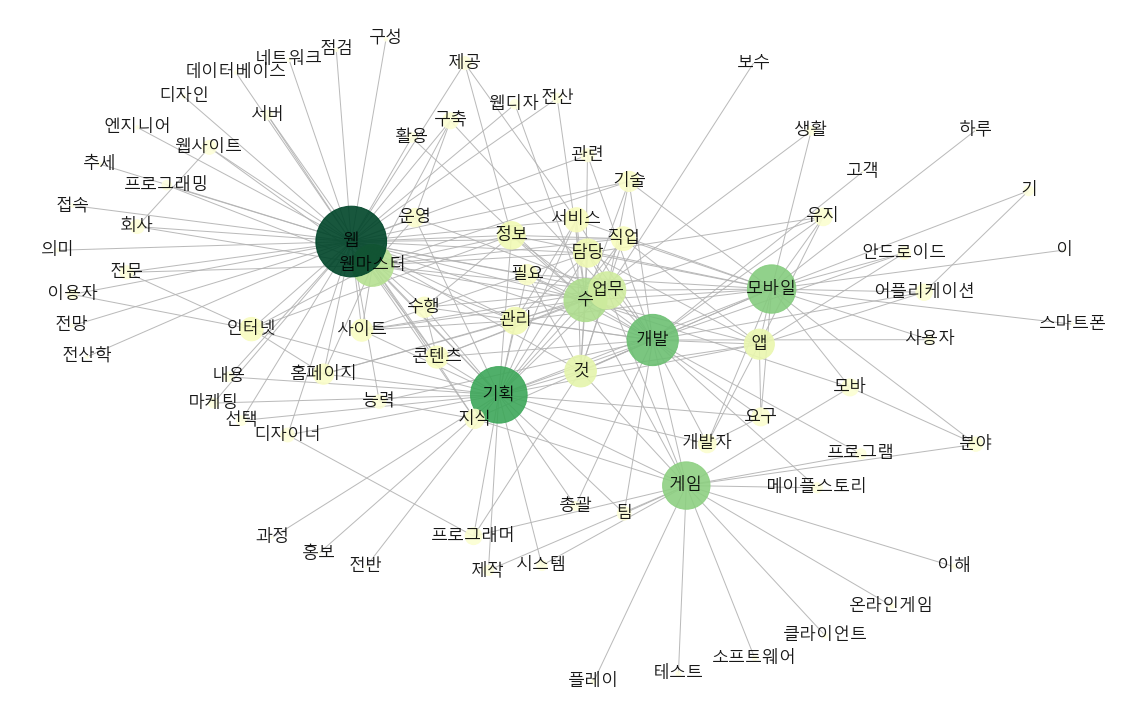

In [62]:
pos = nx.kamada_kawai_layout(G)
plt.rcParams['font.family']= 'Malgun Gothic'
plt.figure(figsize=(20,13))
plt.axis('off')

nx.draw_networkx(G, font_family='Malgun Gothic', font_size = 17,
                pos= pos, node_color=list(pr.values()),
                node_size = nsize, alpha=0.9, edge_color='.7', cmap=plt.cm.YlGn)

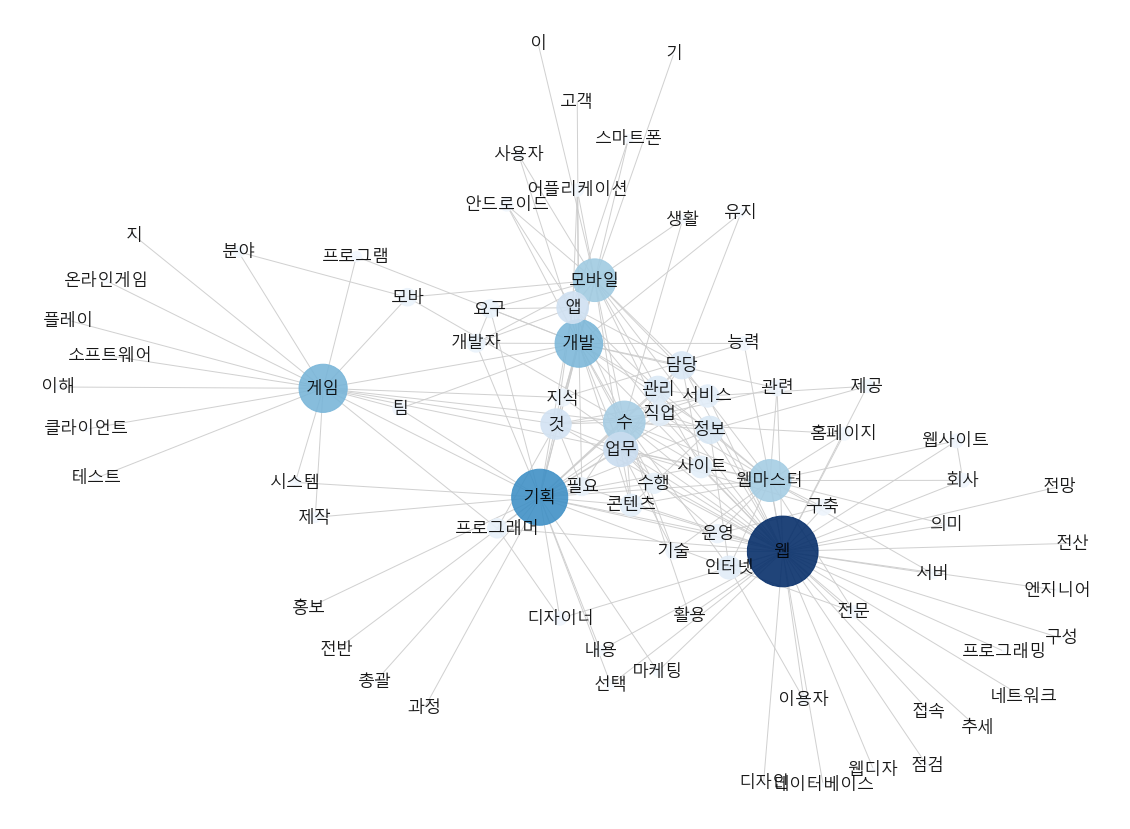

In [32]:
pos = nx.fruchterman_reingold_layout(G)
plt.rcParams['font.family']= 'Malgun Gothic'
plt.figure(figsize=(20,15))
plt.axis('off')

nx.draw_networkx(G, font_family='Malgun Gothic', font_size = 17,
                pos= pos, node_color=list(pr.values()),
                node_size = nsize, alpha=0.9, edge_color='.8', cmap=plt.cm.Blues)

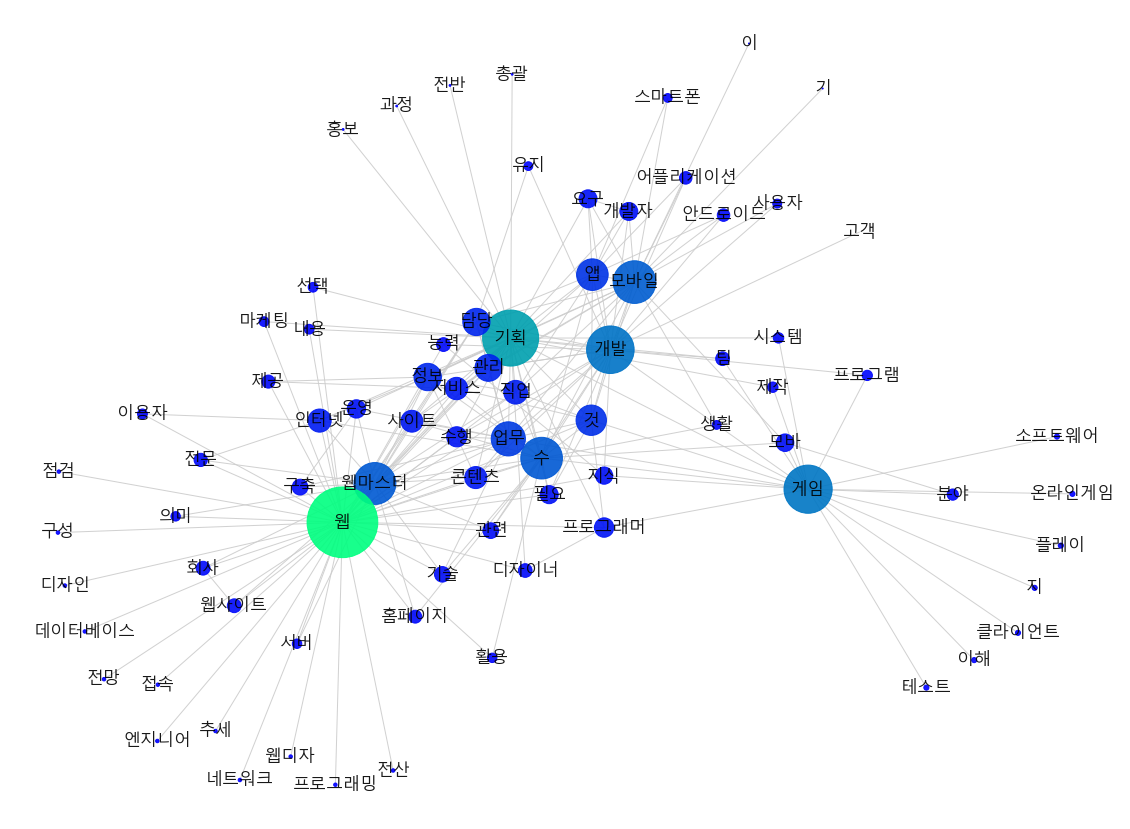

In [37]:
pos = nx.fruchterman_reingold_layout(G)
plt.rcParams['font.family']= 'Malgun Gothic'
plt.figure(figsize=(20,15))
plt.axis('off')

nx.draw_networkx(G, font_family='Malgun Gothic', font_size = 17,
                pos= pos, node_color=list(pr.values()),
                node_size = nsize, alpha=0.9, edge_color='.8', cmap=plt.cm.winter)